In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import modeling
import evaluation
from utils import data_loading
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef, roc_curve, roc_auc_score, accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
true_label = {}
pred_label = {}

# Use ZaloAI dataset

In [3]:
zalo_train = data_loading.load_train(['zaloai'])
zalo_test = data_loading.load_test(['zaloai'])
zalo_train

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
16292,Tổ chức WTO hiện nay có bao nhiêu thành viên,Đất nước Hy Lạp ngày nay là một quốc gia phát ...,False
16293,Tổ chức WTO hiện nay có bao nhiêu thành viên,Các cộng đồng châu Âu là thành viên của Tổ chứ...,False
16294,Kỳ họp Quốc hội mới nhất là lần thứ bao nhiêu,Địa vị pháp lý của một đại biểu quốc hội được ...,False
16295,Kỳ họp Quốc hội mới nhất là lần thứ bao nhiêu,"Trong kỳ họp Quốc hội khóa XIV lần thứ nhất, ô...",False


In [4]:
X_train = zalo_train.drop(columns=['label'])
y_train = zalo_train['label']
X_test = zalo_test.drop(columns=['label'])
y_test = zalo_test['label']

In [7]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
true_label['ZaloAI'] = y_test
pred_label['ZaloAI'] = y_pred

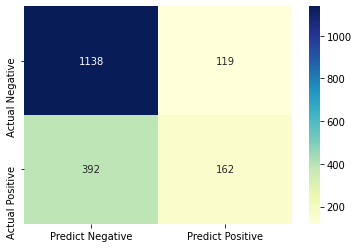

In [8]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [9]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.74      0.91      0.82      1257
        True       0.58      0.29      0.39       554

    accuracy                           0.72      1811
   macro avg       0.66      0.60      0.60      1811
weighted avg       0.69      0.72      0.69      1811



# Use ZaloAI + SquadVN dataset

In [10]:
squad_vn_train = data_loading.load_train(['zaloai', 'mailong25', 'facebook'])
squad_vn_test = data_loading.load_test(['zaloai', 'mailong25', 'facebook'])
squad_vn_train

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
5490,Ai đã xác định Vaginailis?,Có khoảng 58 triệu ca nhiễm bệnh này trong năm...,True
5491,Bộ phận nào trong quá khứ có quyền ra quyết đị...,Hiến pháp Hoa Kỳ phân chia quyền lực giữa hai ...,True
5492,Lễ trao giải diễn ra khi nào?,"Lễ trao giải Oscar lần thứ 89, tổ chức bởi Việ...",True
5493,Các mẫu được nhắm đến ai?,Dòng Nokia 3000 chủ yếu là điện thoại tầm tru...,True


In [11]:
X_train = squad_vn_train.drop(columns=['label'])
y_train = squad_vn_train['label']
X_test = squad_vn_test.drop(columns=['label'])
y_test = squad_vn_test['label']

In [13]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
true_label['ZaloAI+SquadVN'] = y_test
pred_label['ZaloAI+SquadVN'] = y_pred

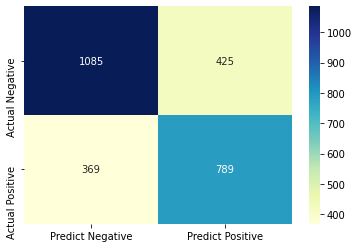

In [14]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [15]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.75      0.72      0.73      1510
        True       0.65      0.68      0.67      1158

    accuracy                           0.70      2668
   macro avg       0.70      0.70      0.70      2668
weighted avg       0.70      0.70      0.70      2668



# Use ZaloAI + SquadVN + Squad dataset

In [45]:
squad_train = data_loading.load_train(['zaloai', 'mailong25', 'facebook', 'squad'])
squad_test = data_loading.load_test(['zaloai', 'mailong25', 'facebook', 'squad'])
squad_train

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
65048,Vật lý học đã thống nhất rộng rãi về định nghĩ...,"Thuật ngữ ""vật chất"" được sử dụng trong toàn b...",False
65049,Ai là người đặt ra thuật ngữ partonic vật chất?,"Thuật ngữ ""vật chất"" được sử dụng trong toàn b...",False
65050,Tên khác của phản vật chất là gì?,"Thuật ngữ ""vật chất"" được sử dụng trong toàn b...",False
65051,Vật chất thường không cần dùng kết hợp với cái...,"Thuật ngữ ""vật chất"" được sử dụng trong toàn b...",False


In [18]:
X_train = squad_train.drop(columns=['label'])
y_train = squad_train['label']
X_test = squad_test.drop(columns=['label'])
y_test = squad_test['label']

In [15]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
true_label['ZaloAI+SquadVN+Squad'] = y_test
pred_label['ZaloAI+SquadVN+Squad'] = y_pred

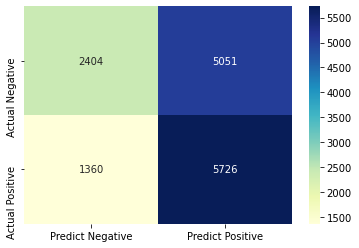

In [16]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [17]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.64      0.32      0.43      7455
        True       0.53      0.81      0.64      7086

    accuracy                           0.56     14541
   macro avg       0.58      0.57      0.53     14541
weighted avg       0.59      0.56      0.53     14541



<AxesSubplot:xlabel='dataset', ylabel='count'>

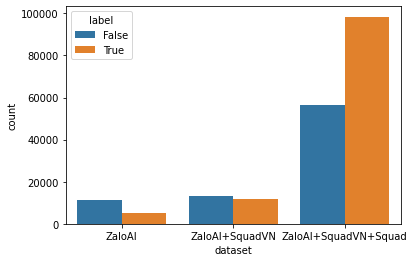

In [18]:
label_count = pd.concat([
    zalo_train.join(pd.Series(np.full(len(zalo_train), 'ZaloAI'), name='dataset'))[['dataset', 'label']],
    squad_vn_train.join(pd.Series(np.full(len(squad_vn_train), 'ZaloAI+SquadVN'), name='dataset'))[['dataset', 'label']],
    squad_train.join(pd.Series(np.full(len(squad_train), 'ZaloAI+SquadVN+Squad'), name='dataset'))[['dataset', 'label']]
], axis = 0)
sns.countplot(x='dataset', hue='label', data=label_count)

In [47]:
false_label_cnt = (squad_train['label'] == False).sum()
false_label_cnt

56622

In [48]:
# Equalize label distribution
squad_train = pd.concat([squad_train.query('label == False'), squad_train.query('label == True').iloc[: false_label_cnt]])

<AxesSubplot:>

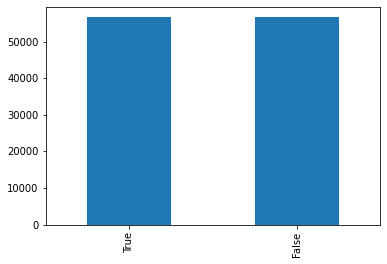

In [50]:
squad_train = squad_train.sample(frac=1, random_state=42)
squad_train['label'].value_counts().plot(kind='bar')

In [51]:
X_train = squad_train.drop(columns=['label'])
y_train = squad_train['label']
X_test = squad_test.drop(columns=['label'])
y_test = squad_test['label']

In [52]:
model = modeling.get_model('logit')(vectorizer='tfidf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
true_label['squad'] = y_test
pred_label['squad'] = y_pred

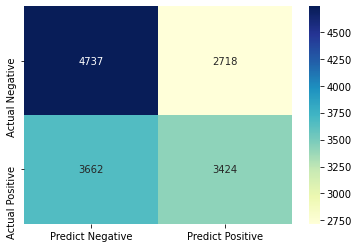

In [53]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [54]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.56      0.64      0.60      7455
        True       0.56      0.48      0.52      7086

    accuracy                           0.56     14541
   macro avg       0.56      0.56      0.56     14541
weighted avg       0.56      0.56      0.56     14541



(array([0, 1, 2]),
 [Text(0, 0, 'ZaloAI'),
  Text(1, 0, 'ZaloAI+SquadVN'),
  Text(2, 0, 'ZaloAI+SquadVN+Squad')])

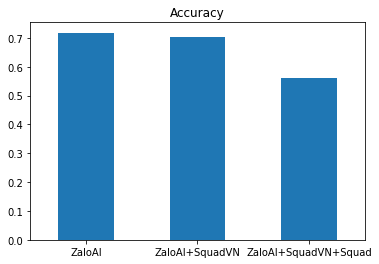

In [104]:
acc_score_dict = {}
for dataset in true_label.keys():
    acc_score_dict[dataset] = accuracy_score(true_label[dataset], pred_label[dataset])
    
acc_score_series = pd.Series(acc_score_dict)
plt.title('Accuracy')
acc_score_series.plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'ZaloAI'),
  Text(1, 0, 'ZaloAI+SquadVN'),
  Text(2, 0, 'ZaloAI+SquadVN+Squad')])

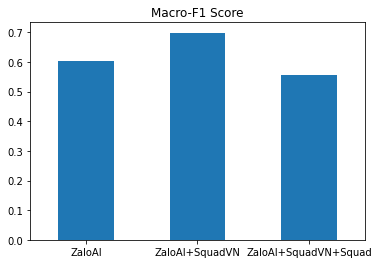

In [105]:
f1_score_dict = {}
for dataset in true_label.keys():
    f1_score_dict[dataset] = f1_score(true_label[dataset], pred_label[dataset], average='macro')
    
f1_score_series = pd.Series(f1_score_dict)
plt.title('Macro-F1 Score')
f1_score_series.plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'ZaloAI'),
  Text(1, 0, 'ZaloAI+SquadVN'),
  Text(2, 0, 'ZaloAI+SquadVN+Squad')])

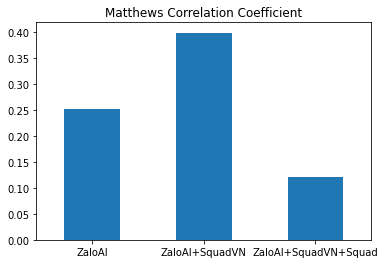

In [106]:
mcc_score_dict = {}
for dataset in true_label.keys():
    mcc_score_dict[dataset] = matthews_corrcoef(true_label[dataset], pred_label[dataset])
    
mcc_score_series = pd.Series(mcc_score_dict)
plt.title('Matthews Correlation Coefficient')
mcc_score_series.plot(kind='bar')
plt.xticks(rotation=0)

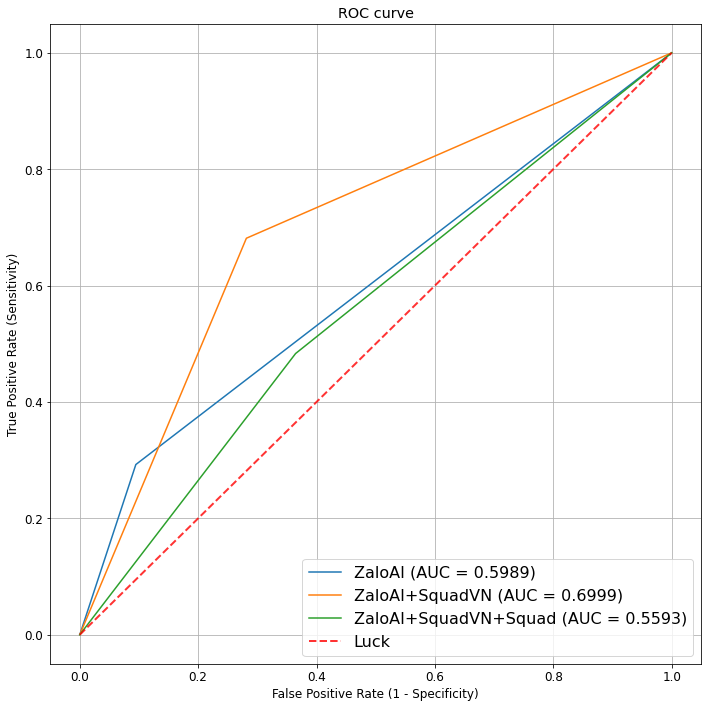

In [108]:
plt.figure(figsize=(10, 10))
for dataset in true_label.keys():
    fpr, tpr, thresholds = roc_curve(true_label[dataset], pred_label[dataset])
    score = roc_auc_score(true_label[dataset], pred_label[dataset])
    plt.plot(fpr, tpr, label='%s (AUC = %0.4f)' % (dataset, score))

plt.plot(
        [0, 1], [0, 1],
        linestyle='--',
        lw=2,
        color='r',
        label='Luck',
        alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=16)
plt.tight_layout()
plt.grid(True)